In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from textblob import TextBlob

# Load the cleaned dataset
df = pd.read_csv('cleaned_tweets.csv')

# Function to get the sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Function to classify the sentiment based on polarity
def classify_sentiment(polarity_score):
    if polarity_score > 0:
        return 'Positive'
    elif polarity_score == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis to the 'cleaned_text' column
df['sentiment_score'] = df['cleaned_text'].apply(get_sentiment)

# Classify the sentiment as positive, neutral, or negative
df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

# Save the DataFrame with the sentiment scores and classifications
df.to_csv('tweets_with_textblob_sentiment.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'tweets_with_textblob_sentiment.csv'

In [ ]:
pip install vaderSentiment

In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the cleaned dataset
df = pd.read_csv('cleaned_tweets.csv')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get the VADER compound sentiment score
def get_vader_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']  # Compound score gives overall sentiment

# Function to classify sentiment based on the compound score
def classify_vader_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'cleaned_text' column
df['sentiment_score'] = df['cleaned_text'].apply(get_vader_sentiment)

# Classify the sentiment as positive, neutral, or negative
df['sentiment'] = df['sentiment_score'].apply(classify_vader_sentiment)

# Save the DataFrame with the sentiment scores and classifications
df.to_csv('tweets_with_vader_sentiment.csv', index=False)

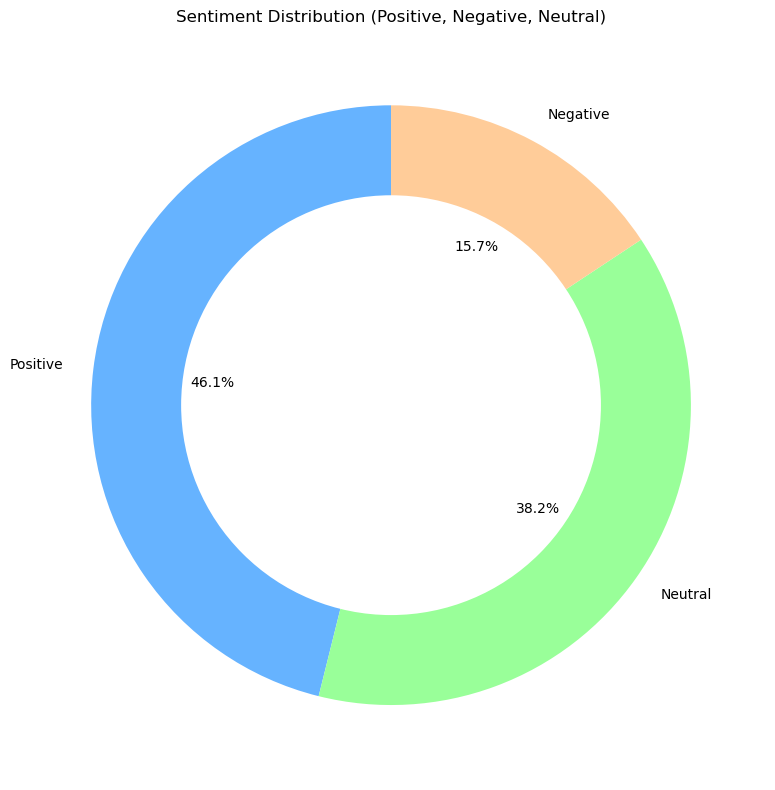

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
textblob_df = pd.read_csv('tweets_with_textblob_sentiment.csv')

# Count the sentiment categories
sentiment_counts = textblob_df['sentiment'].value_counts()

# Create a doughnut plot
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
center_circle = plt.Circle((0,0), 0.70, fc='white')  # Create a doughnut effect
plt.gca().add_artist(center_circle)

# Add a title
plt.title('Sentiment Distribution (Positive, Negative, Neutral)')
plt.tight_layout()
plt.show()

In [10]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 660.6 kB/s eta 0:00:01
   ------------ --------------------------- 92.2/301.4 kB 1.1 MB/s eta 0:00:01
   --------------------------------- ------ 256.0/301.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 1.9 MB/s eta 0:00:00


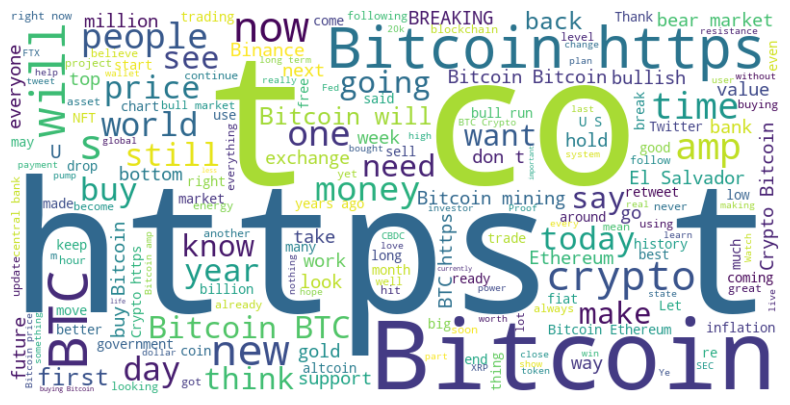

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
textblob_df = pd.read_csv('tweets_with_textblob_sentiment.csv')

# Extract hashtags (assuming hashtags are part of the cleaned text)
hashtags = ' '.join([word for word in textblob_df['text'] if '#' in word])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(hashtags)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


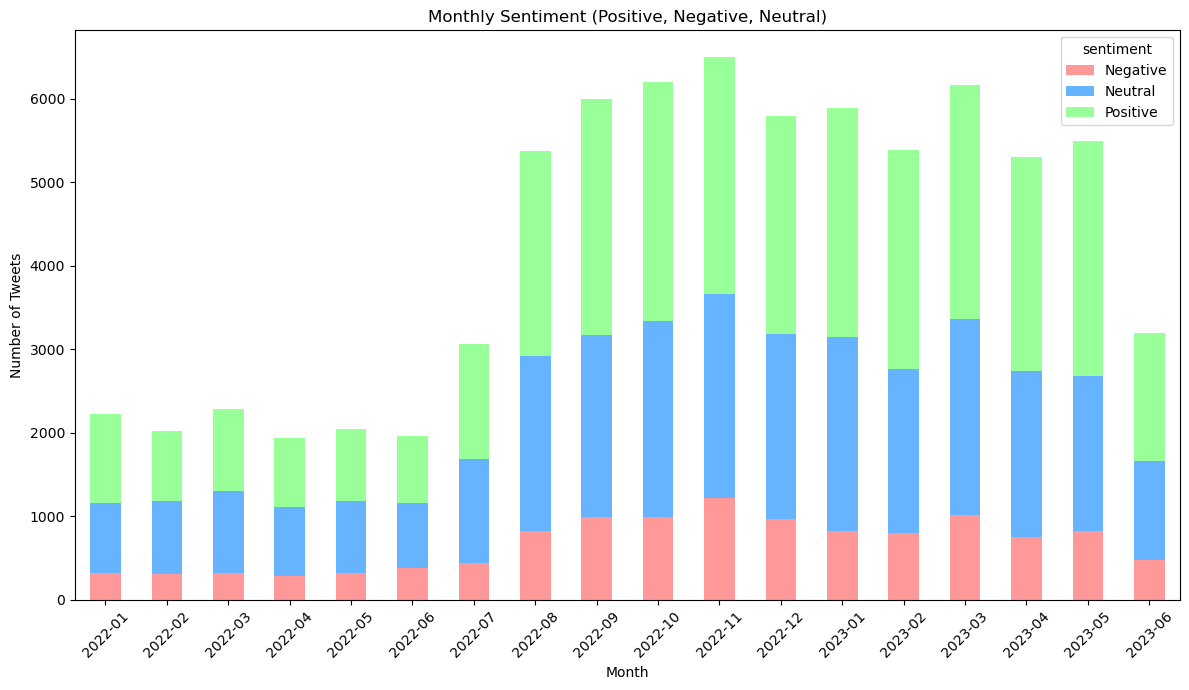

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
textblob_df = pd.read_csv('tweets_with_textblob_sentiment.csv')

# Convert the date column to datetime
textblob_df['date'] = pd.to_datetime(textblob_df['date'], format='%d/%m/%Y')

# Group by month and sentiment category
monthly_sentiment = textblob_df.groupby([textblob_df['date'].dt.to_period('M'), 'sentiment']).size().unstack()

# Plot the bar chart
monthly_sentiment.plot(kind='bar', stacked=True, figsize=(12, 7), color=['#ff9999','#66b3ff','#99ff99'])
plt.title('Monthly Sentiment (Positive, Negative, Neutral)')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
